In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np 
from tqdm import tqdm

with open('attention_vis_with_time.pickle', 'rb') as handle:
    atten_vis = pickle.load(handle)

In [2]:
atten_vis['t1']

{2: array([[0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00],
        [4.65921494e+05, 1.16680950e+07],
        [4.66066062e+05, 1.32513310e+07],
        [1.91217981e+04, 8.52169000e+06],
        [1.95922376e+04, 8.52952400e+06],
        [1.61418278e+05, 4.90657800e+06],
        [1.75955519e+05, 5.18341600e+06],
        [9.37267016e+04, 4.71440700e+06],
        [1.01737304e+05, 4.93556300e+06],
        [7.16364809e+03, 4.41707600e+06],
        [1.05645240e+04, 3.84168300e+06],
        [1.01643471e+04, 3.83419300e+06],
        [6.70789802e+03, 4.38391800e+06],
        [3.98032223e+04, 3.02236100e+06],
        [3.67989436e+04, 2.88312100e+06],
        [4.44924932e+04, 3.03494100e+06],
        [3.73691425e+04, 3.10169600e+06],
        [2.69082452e+04, 2.43039400e+06],
        [2.18860357e+04, 2.49593400e+06],
        [1.76296663e+04, 2.04881300e+06],
        [2.06728847e+04, 2.09991700e+06],
        [1.01701909e+04, 1.55499700e+06],
        [1.61479095e+04, 1.8413

In [3]:
with open('id2relation.pickle', 'rb') as handle:
    id2relation = pickle.load(handle)

In [4]:
def plot_attention(atten_vis, time_periods='t1'):
    num_rel = len(list(id2relation.keys()))
    atten_mat = np.zeros((num_rel, num_rel))
    for i in id2relation.keys():
        if i not in atten_vis[time_periods].keys():
            continue
        attn_at_i = atten_vis[time_periods][i][:, 0] / atten_vis[time_periods][i][:, 1]
        atten_mat[i, :] = attn_at_i.reshape(1, -1)
    atten_mat = np.nan_to_num(atten_mat, nan=0)
    plt.matshow(atten_mat)
    plt.colorbar()
    return atten_mat

/tmp/ipykernel_2527887/190653680.py:7: RuntimeWarning: invalid value encountered in divide
  attn_at_i = atten_vis[time_periods][i][:, 0] / atten_vis[time_periods][i][:, 1]


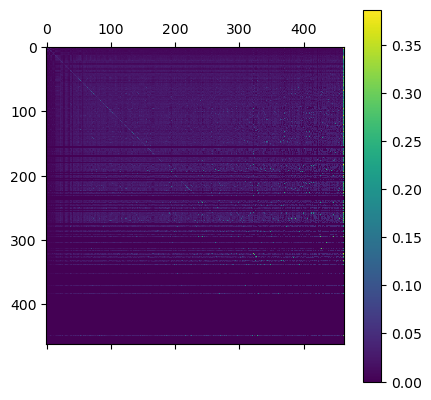

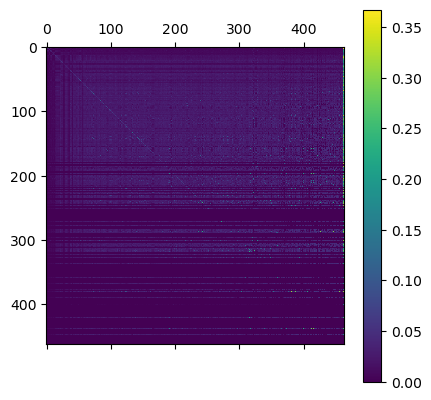

In [5]:
mat4vis_t1 = plot_attention(atten_vis, time_periods='t1')
mat4vis_t2 = plot_attention(atten_vis, time_periods='t2')

In [6]:
def save_fig(mat, filename):
    from matplotlib.font_manager import FontProperties
    import seaborn as sns

    font = FontProperties('sans')
    font.set_size(10)
    font_axis = {'family' : 'sans',
    'weight' : 'light',
    'size'  : 16,
    }

    font_axis2 = {'family' : 'Times New Roman',
    'weight' : 'light',
    'size'  : 22,
    }

    fig =plt.figure(dpi=400, figsize=(7,5))
    sns.heatmap(mat)

    x_pos = np.arange(0, 10, 1) + 0.5
    y_pos = np.arange(0, 10, 1) + 0.5

    labels = np.arange(1, 11, 1) + 0

    plt.xticks(x_pos, labels, rotation=0, fontproperties=font)
    plt.yticks(y_pos, labels, rotation=0, fontproperties=font)

    plt.xlabel('Relations in r-digraphs',font_axis)
    plt.ylabel('Query relations',font_axis)
    plt.title('ICEWS14 (in)', font_axis2)
    plt.savefig(f"ICEWS14 (in){filename}.pdf", bbox_inches='tight', pad_inches=0.02)
    plt.show()

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


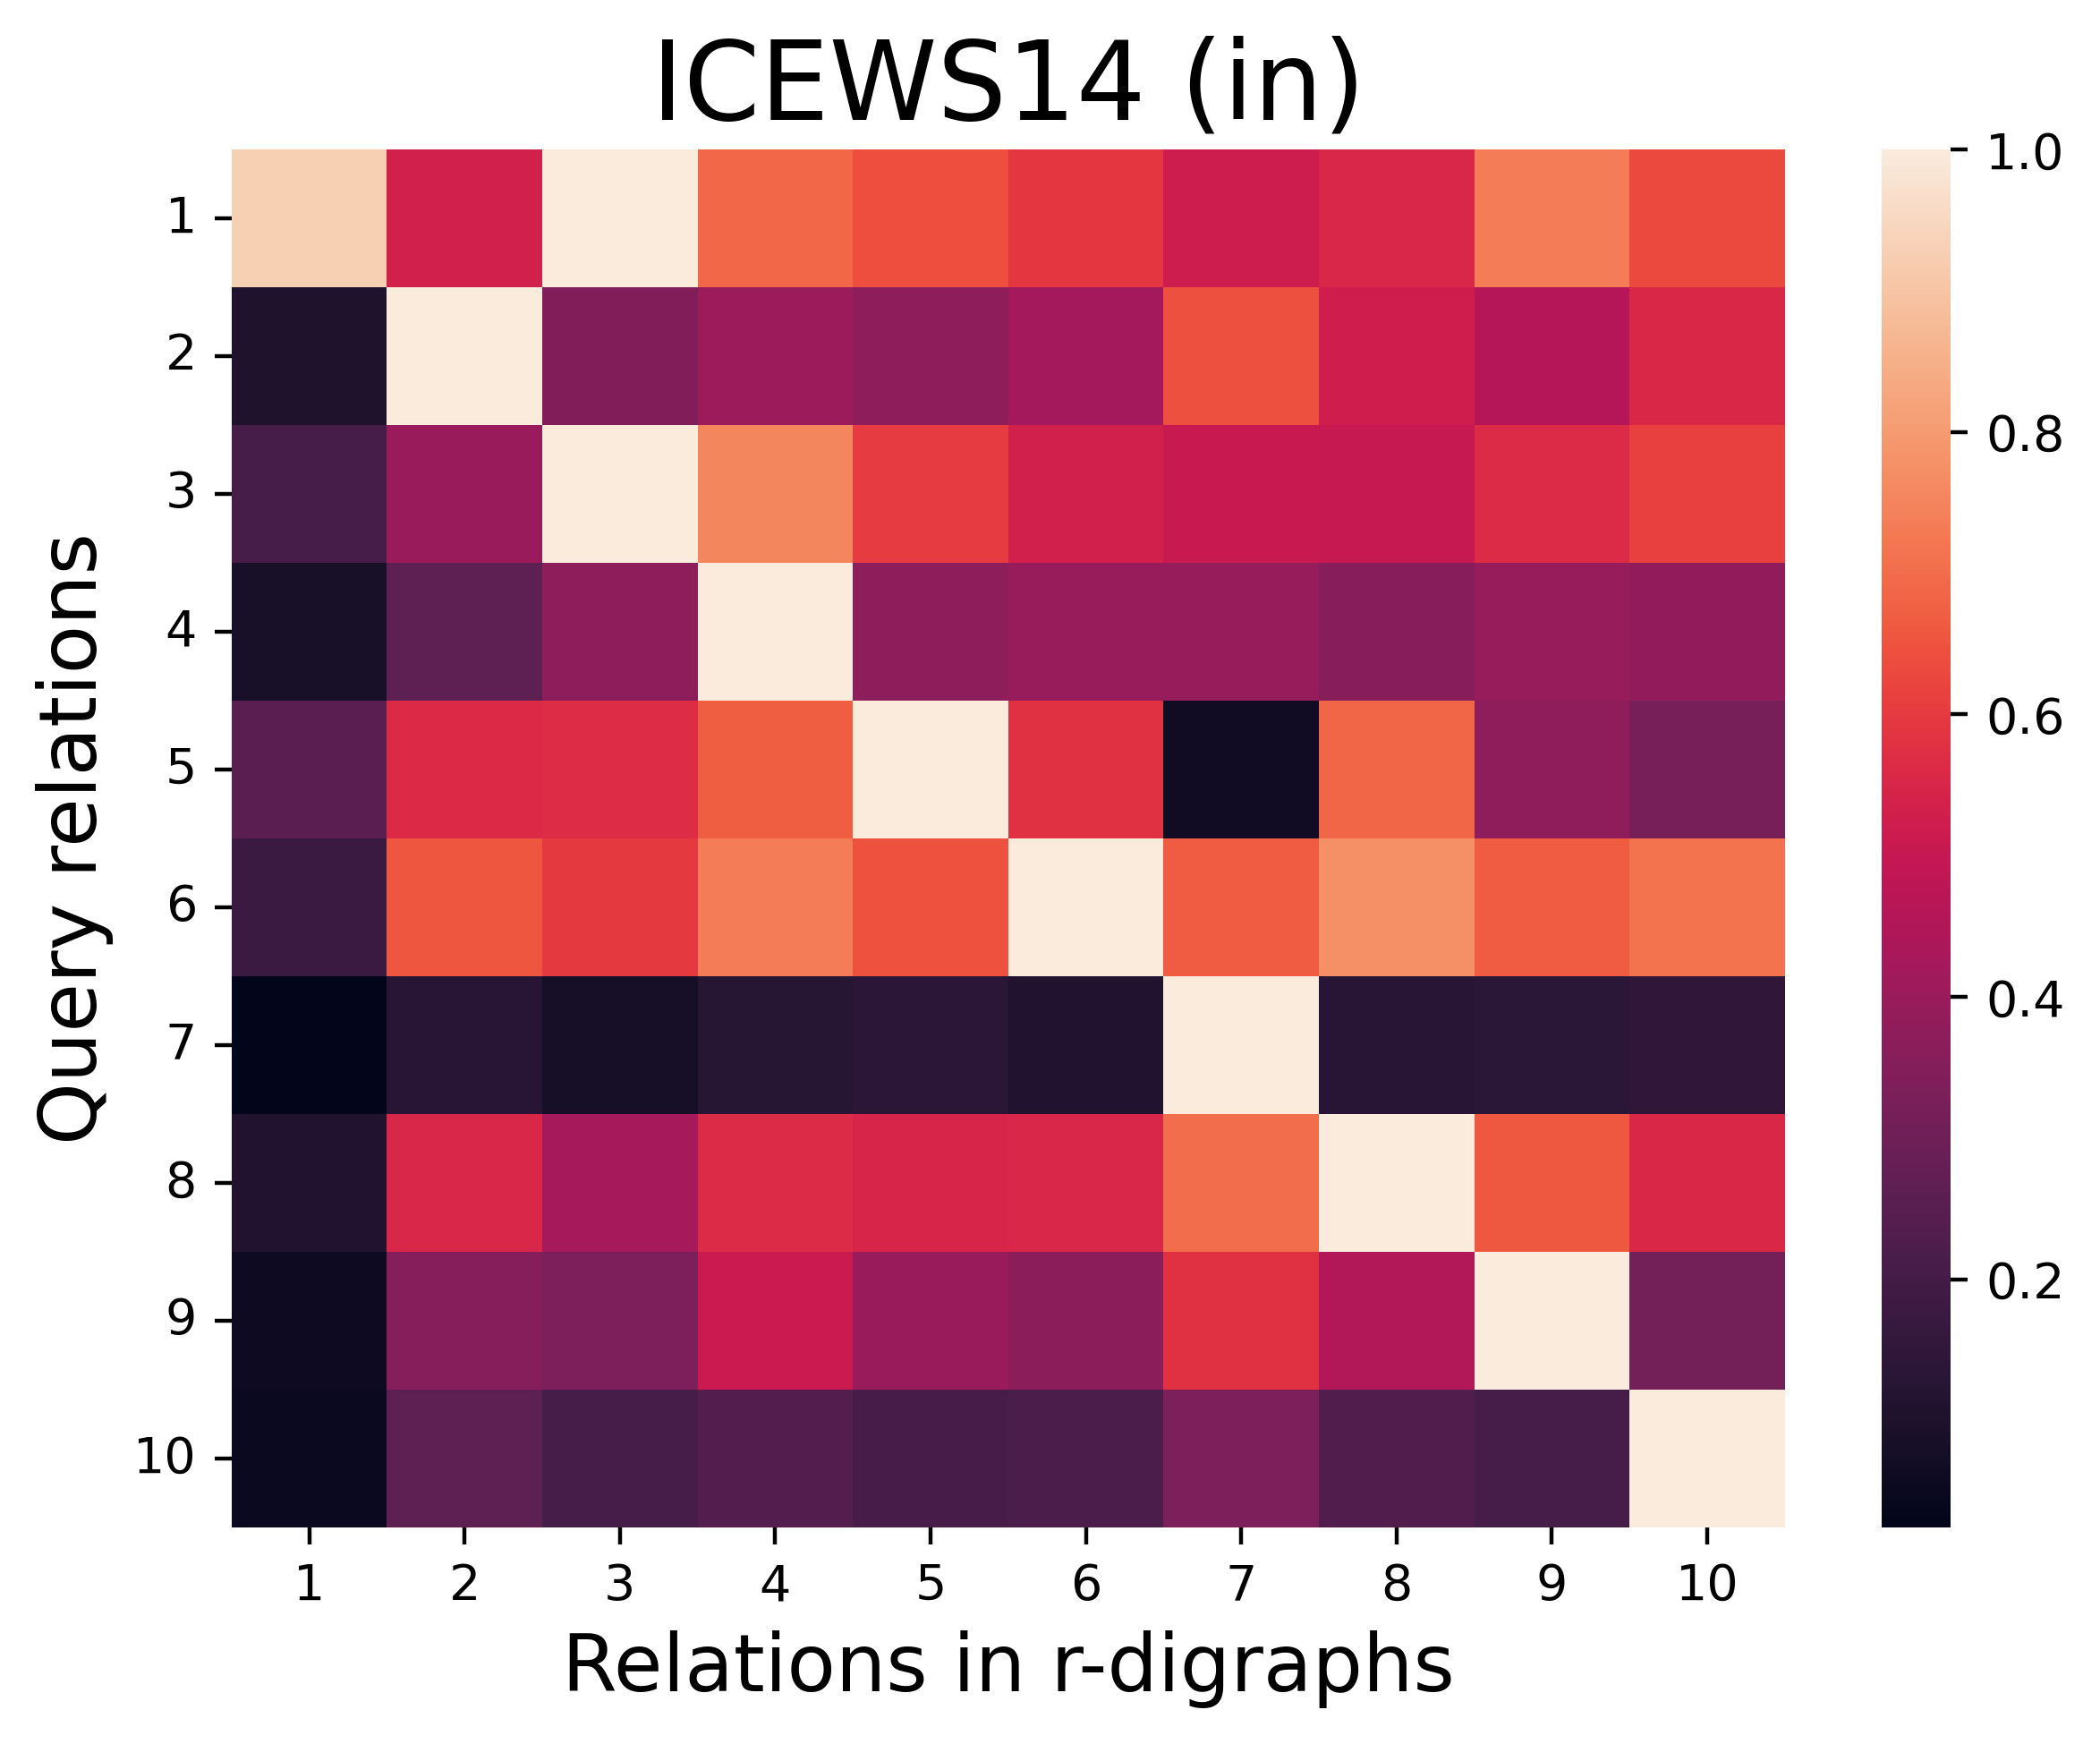

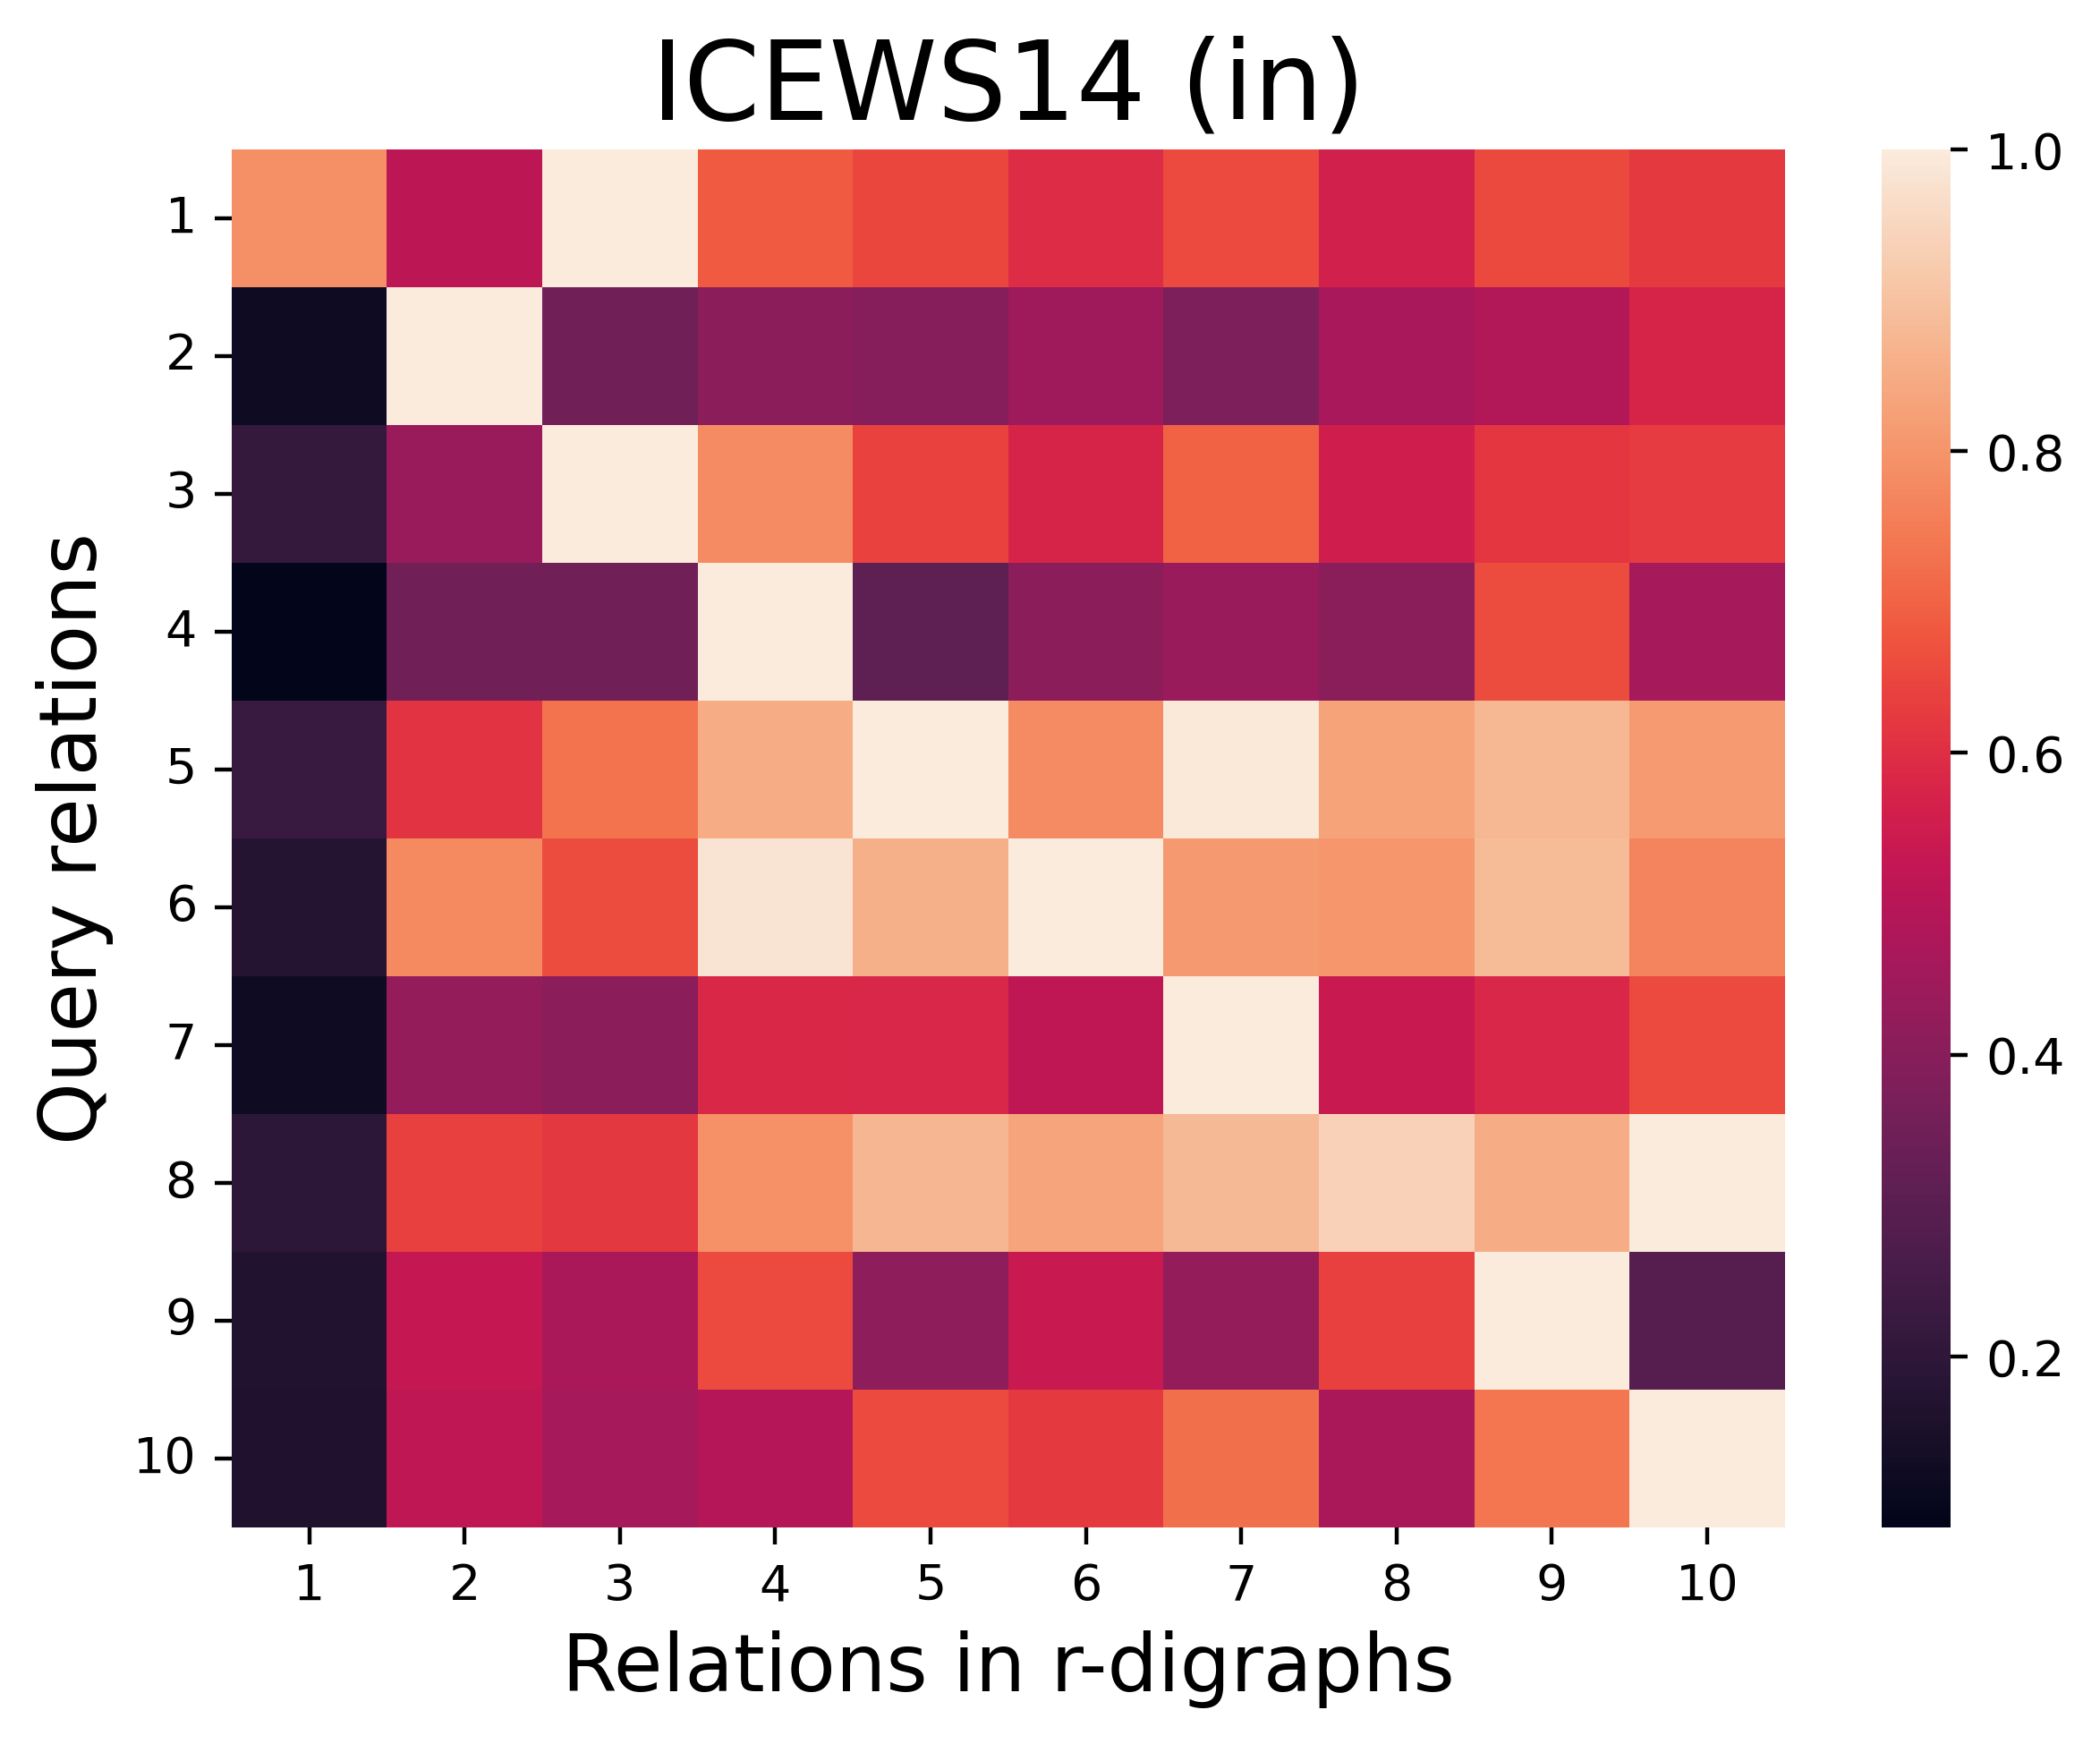

In [7]:


row_weight_t1 = mat4vis_t1.sum(axis=1)
row_weight_t2 = mat4vis_t2.sum(axis=1)

row_weight = row_weight_t1 * row_weight_t2
row_weight = row_weight / row_weight.sum()


col_index = np.random.choice(np.arange(mat4vis_t1.shape[0]), size=10, replace=False, p=row_weight)

mat4vis_t1_filtered = mat4vis_t1[col_index, :][:, col_index]
mat4vis_t1_filtered = mat4vis_t1_filtered / mat4vis_t1_filtered.max(axis=1, keepdims=True)

mat4vis_t2_filtered = mat4vis_t2[col_index, :][:, col_index]
mat4vis_t2_filtered = mat4vis_t2_filtered / mat4vis_t2_filtered.max(axis=1, keepdims=True)

save_fig(mat4vis_t1_filtered, 't1')
save_fig(mat4vis_t2_filtered, 't2')



In [8]:
nan_indices

NameError: name 'nan_indices' is not defined

In [ ]:
print(col_index)

[344 234 224 226  50  59 345 275  67 149]


In [12]:
for idx, id_num in enumerate(col_index):
    print(f'\#{idx+1} & {id2relation[id_num]} \t \\\')

\#1 & engage in negotiation 	 \
\#2 & return, release person(s) 	 \
\#3 & engage in symbolic act 	 \
\#4 & ~express intent to release persons or property 	 \
\#5 & ~express accord 	 \
\#6 & reduce relations 	 \
\#7 & accede to demands for rights 	 \
\#8 & ~expel or deport individuals 	 \
\#9 & ~mediate 	 \
\#10 & ~carry out suicide bombing 	 \
